# manueverMotifs full analysis
## Aggressive trip in motorway - Longitudinal acceleration

### Maria Inês Silva
### 05/02/2019

***

**Contents**

1. [Data and library imports](#section1)
2. [Motif extraction](#section2)
3. [Motif prunning](#section3)
4. [Motif clustering](#section4)
5. [Add-hoc exploration](#section5)

***

<a id='section1'></a>
## 1. Data and library imports

In [1]:
import numpy as np
import pandas as pd
import time
import pickle
from sklearn.cluster import DBSCAN
from extendedMD.emd import find_motifs_from_emd
from extendedMD.viz import create_motif_table
from extendedMD.pruning import prune_motifs_with_mdl

# local code
import sys
import os
sys.path.insert(0, os.path.abspath('../scripts'))
import uah_utils
import motif_utils
import lon_viz

In [2]:
cwd = os.getcwd()
data_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'data-uah/D6'))

driver_df = uah_utils.get_full_point_uah_data(data_folder)
trip_df = driver_df[driver_df['trip_id']=='20151221120051']
ts = trip_df['az'].values
events_ts = trip_df['event_type'].values

**Remove!**

In [3]:
output_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'data-motifs'))
motif_file_name = 'motif_lon_acc_aggressive_trip.p'
dist_file_name = 'dist_lon_acc_aggressive_trip.npy'

motif_dic_list = pickle.load(open(os.path.join(output_folder, motif_file_name), 'rb'))
center_dist_mat = np.load(os.path.join(output_folder, dist_file_name))

<a id='section2'></a>
## 2. Motif extraction

In [4]:
R = 0.1
win_size = 10
paa_size = 2
alphabet_size = 5
adaptive_break_points = False

In [5]:
start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
Motif candidates of size 15 successfully extracted
Motif candidates of size 16 successfully extracted
Motif candidates of size 17 successfully extracted
Motif candidates of size 18 successfully extracted
ExtendedMD algorithm run in 7.05 minutes


In [6]:
len(motif_dic_list)

1959

<a id='section3'></a>
## 3. Motif prunning

In [7]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)

pruned_motif_df = create_motif_table(pruned_motif_dic_list)
pruned_motif_df

,pattern,pattern_len,n_members,mdl_cost,mean_dist
0,[cc],1,167,32201.30,0.04
1,"[de, ee, ed]",3,52,43088.63,0.07
2,"[aa, ab, ac]",3,35,50289.46,0.07
3,"[dd, dc, cc, cb, ca, ba]",6,4,73858.87,0.06
4,"[ba, aa, ab, ac, ad, ae, be, ce, de, ee, ed]",11,3,77543.97,0.06
5,"[ac, ad, bd, cd, de, ee, ed]",7,2,80365.71,0.03


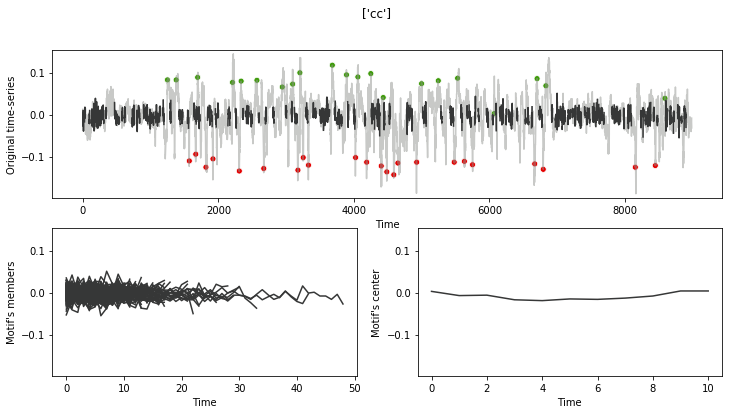

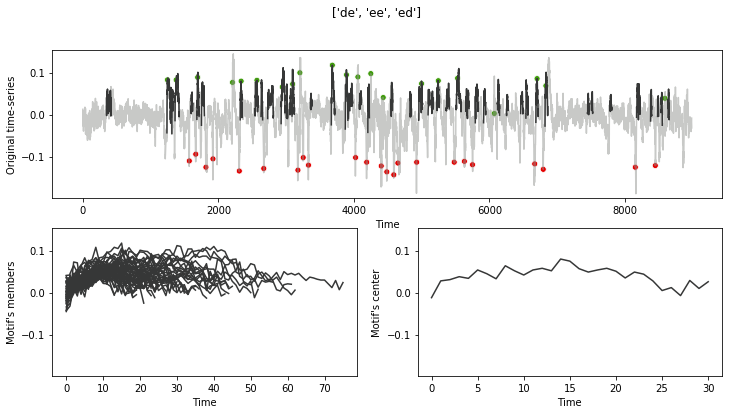

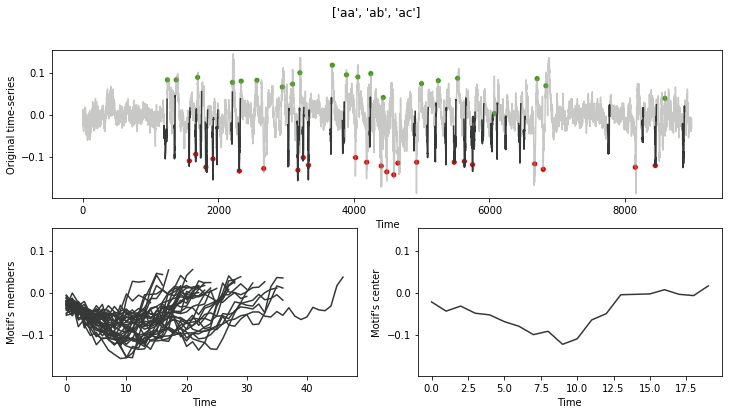

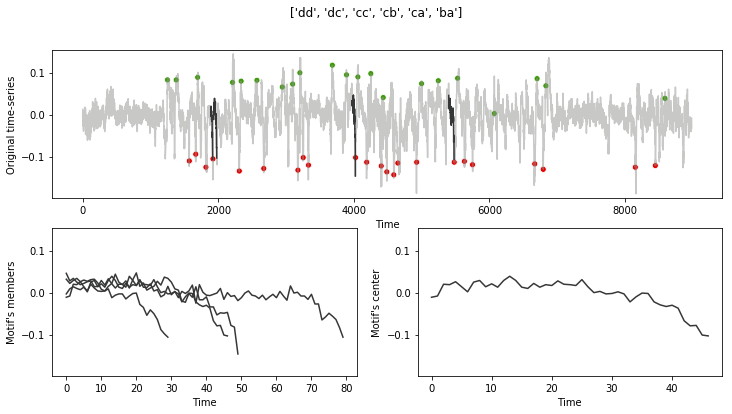

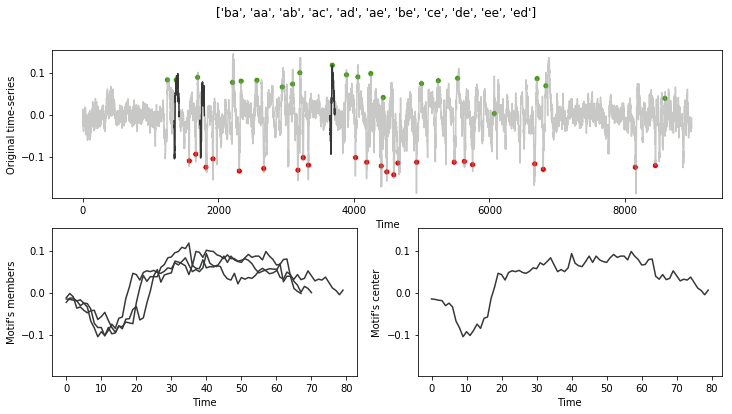

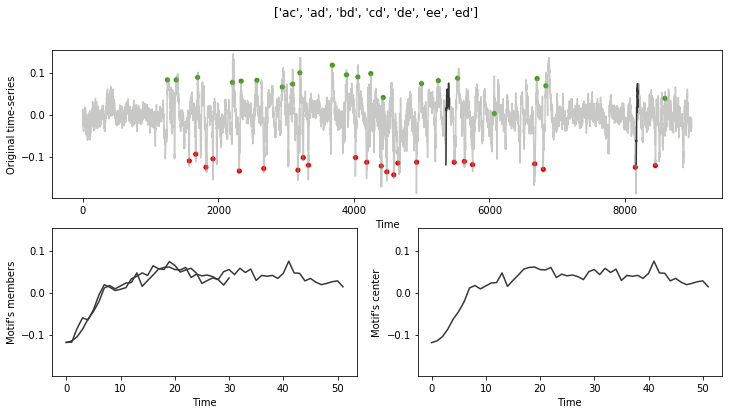

In [8]:
lon_viz.plot_k_lon_motifs(len(pruned_motif_df), ts, events_ts, pruned_motif_dic_list)

<a id='section4'></a>
## 4. Motif clustering

In [ ]:
center_ts_list = []
for motif_dic in motif_dic_list:
    motif_center_ts = [ts[i] for i in motif_dic['center_ts_pointers']]
    center_ts_list.append(motif_center_ts)
center_dist_mat = motif_utils.compute_dtw_distance_matrix(center_ts_list, parallel=True)

In [14]:
dbscan_model = DBSCAN(eps=R/2, metric='precomputed').fit(center_dist_mat)
cluster_labels = dbscan_model.labels_
print(set(cluster_labels))

{0, -1}


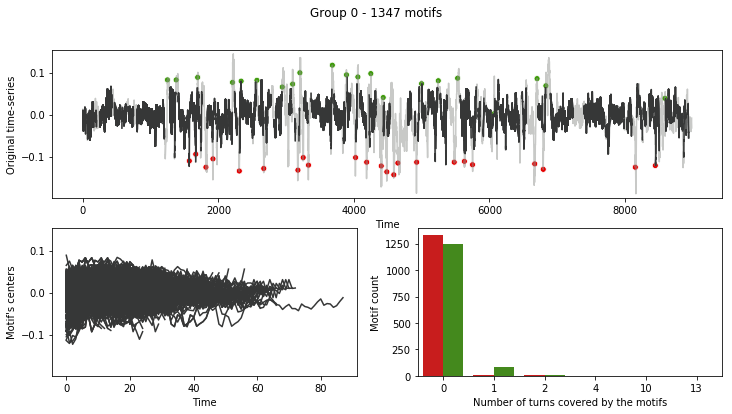

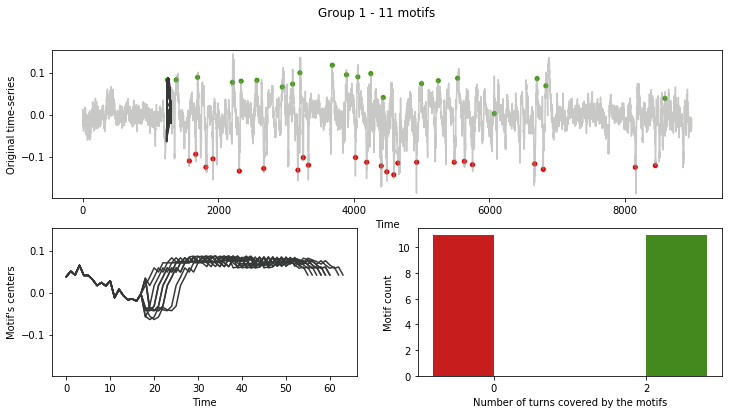

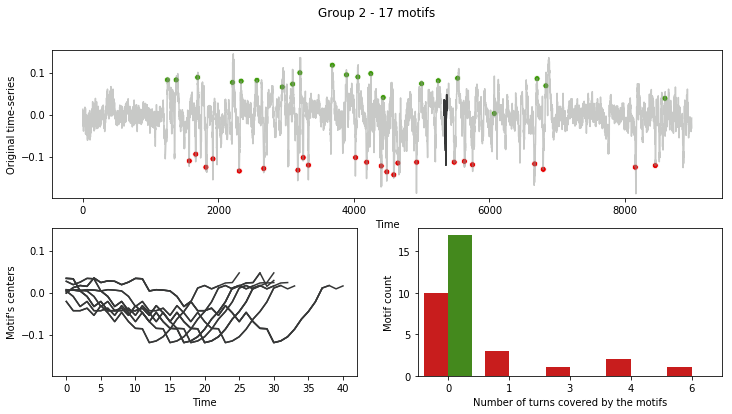

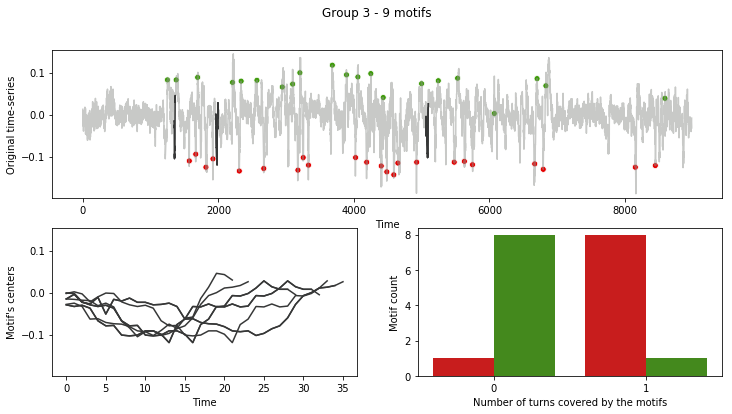

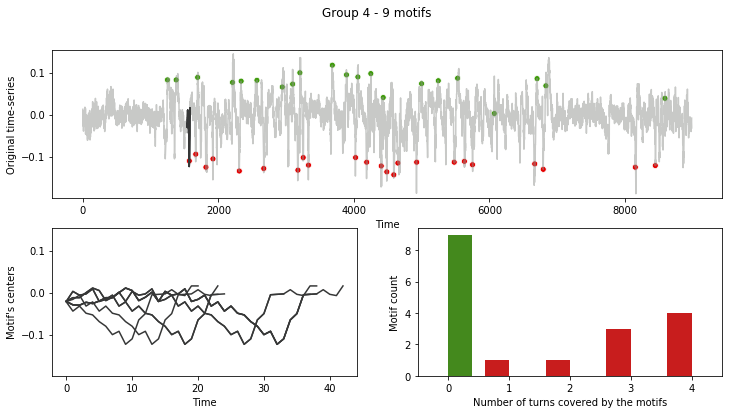

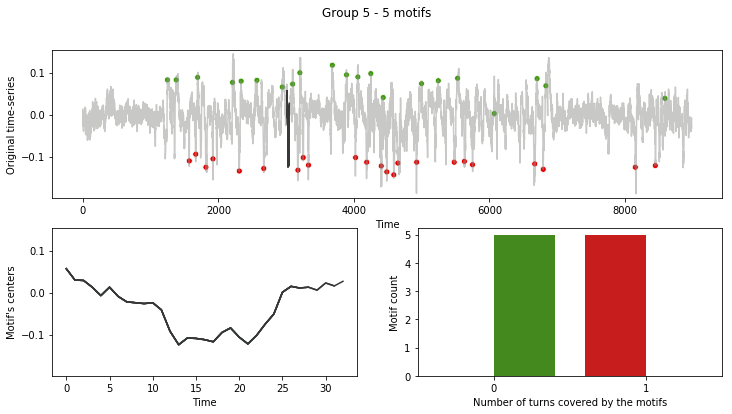

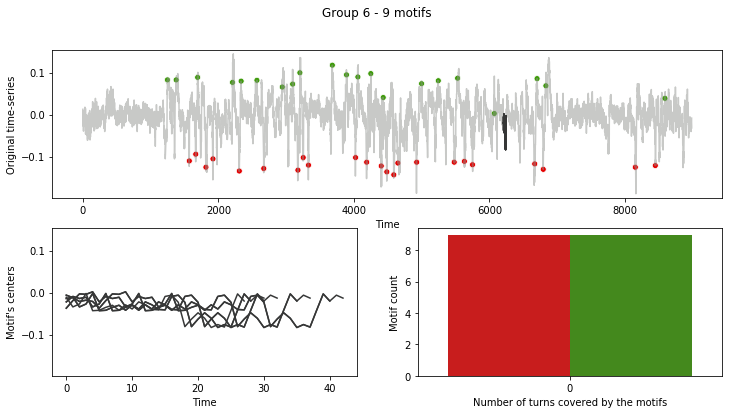

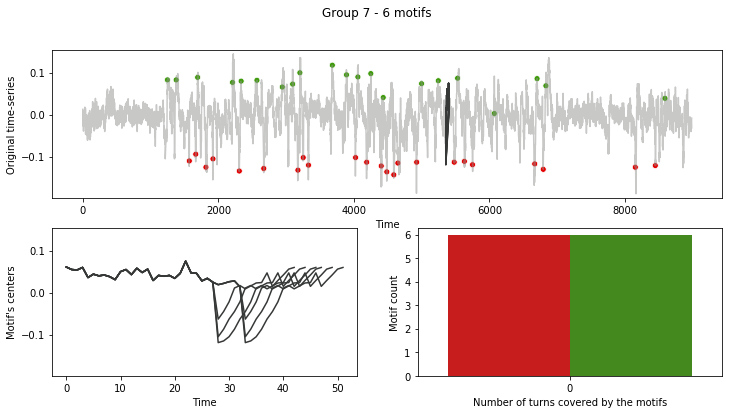

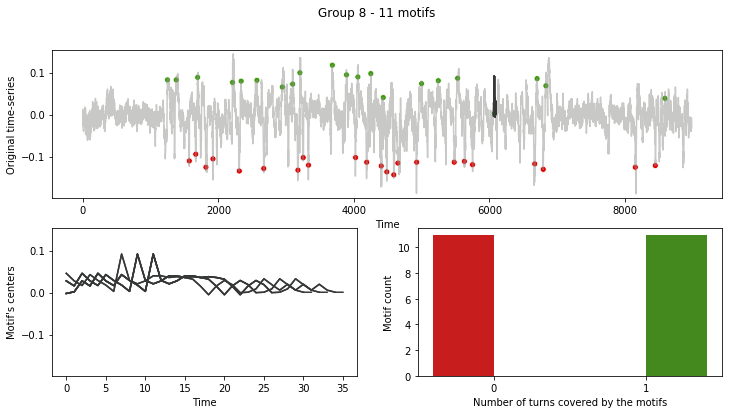

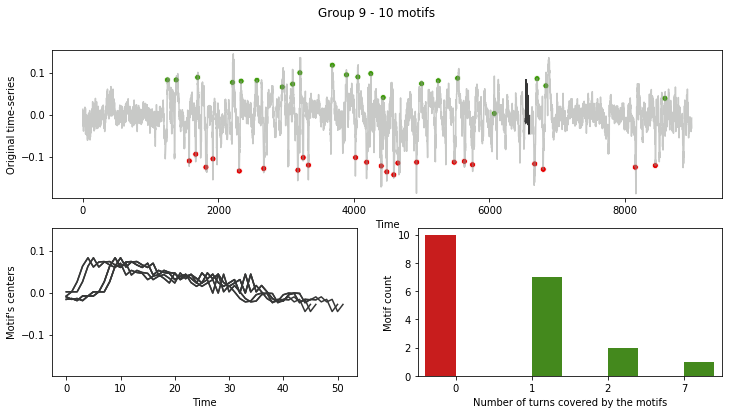

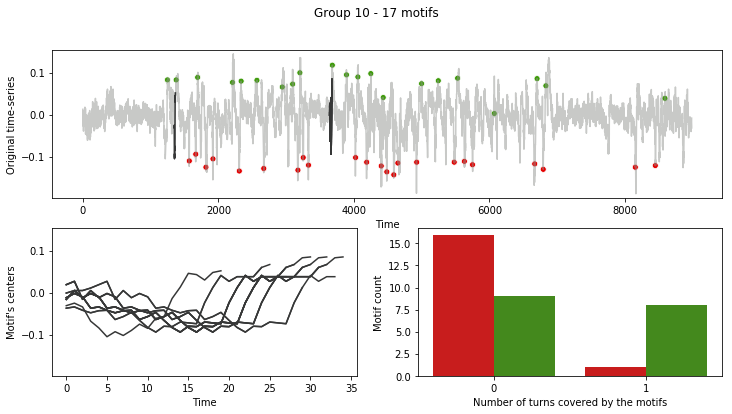

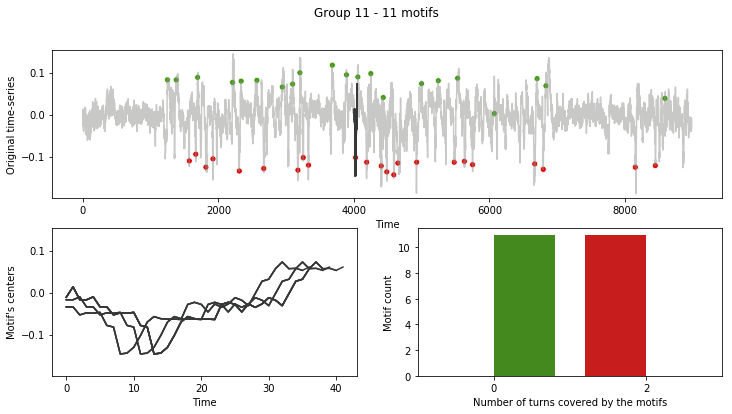

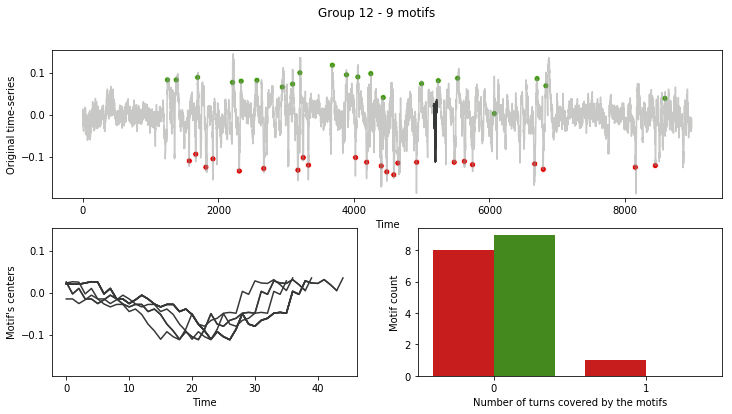

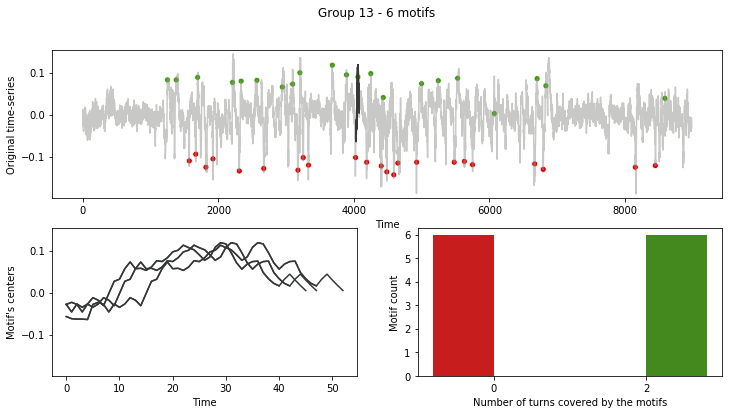

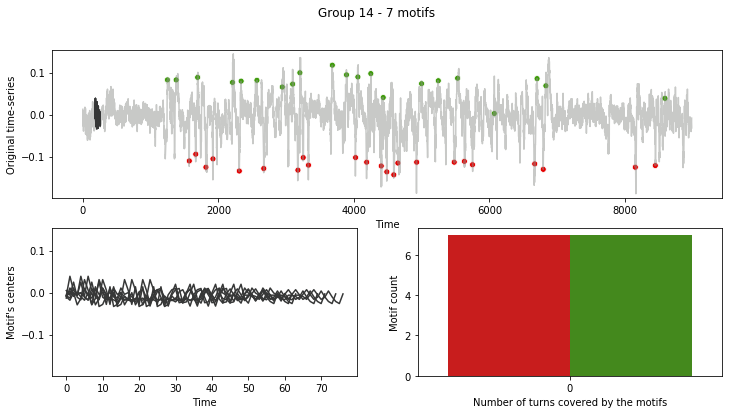

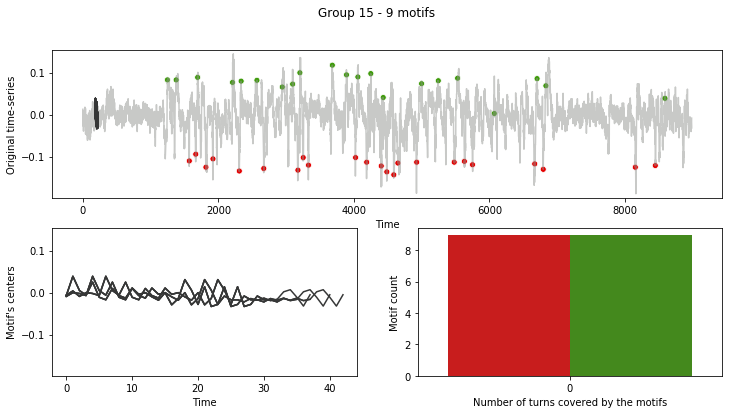

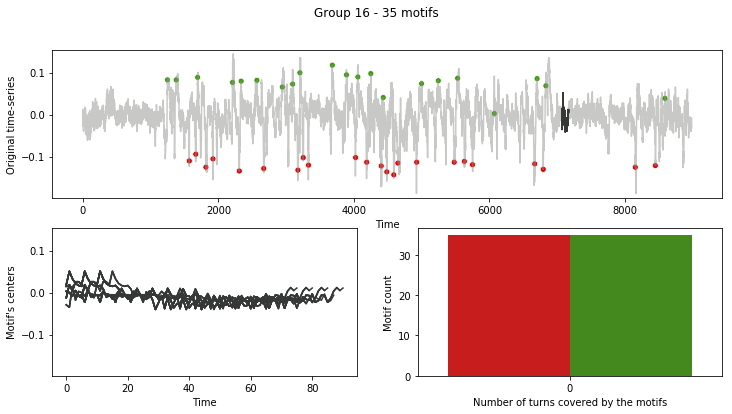

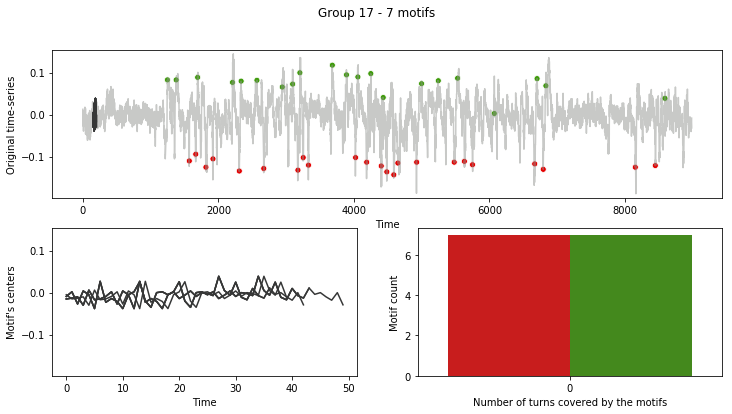

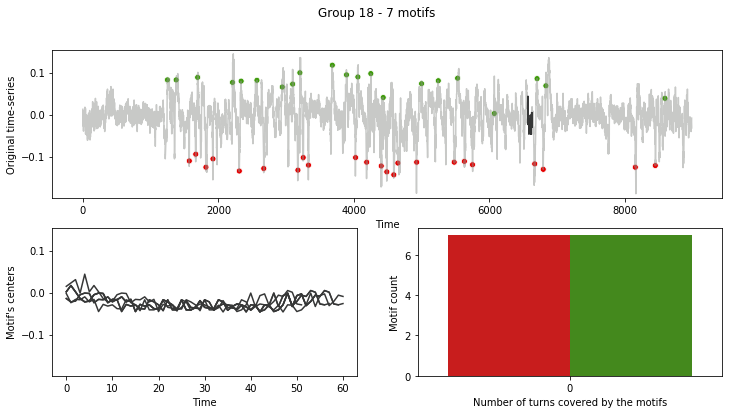

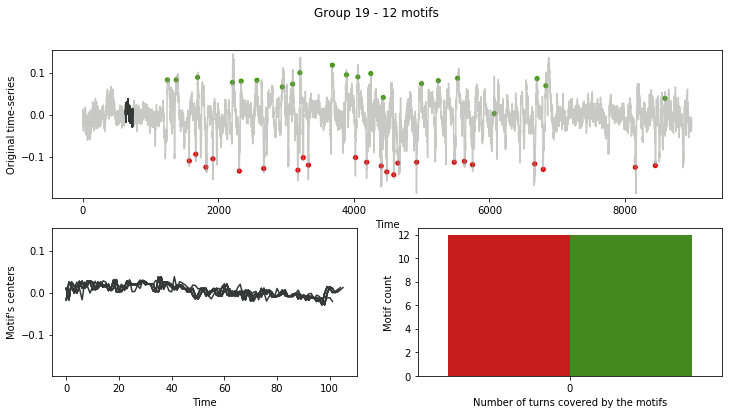

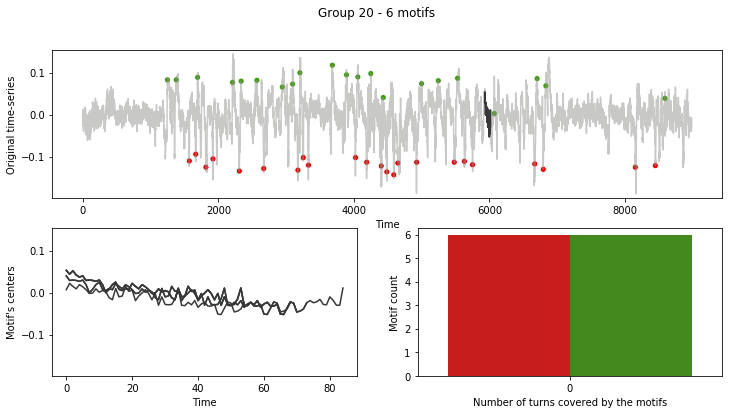

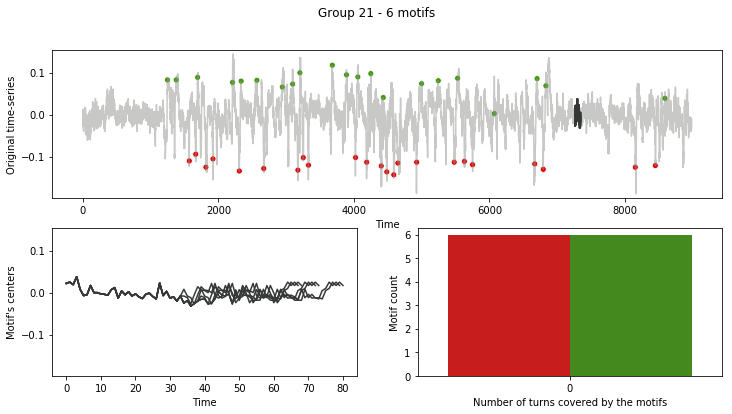

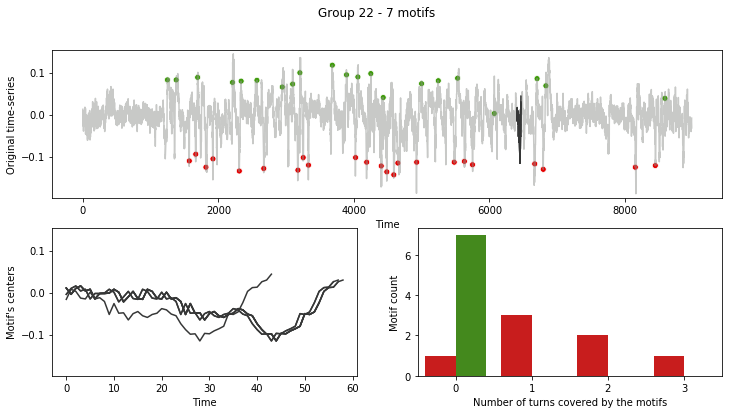

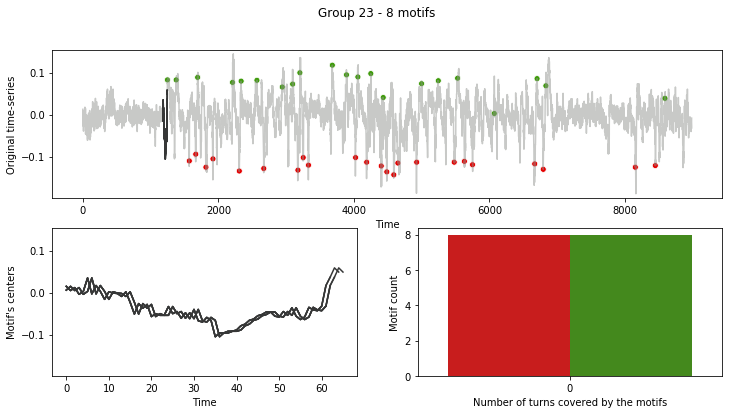

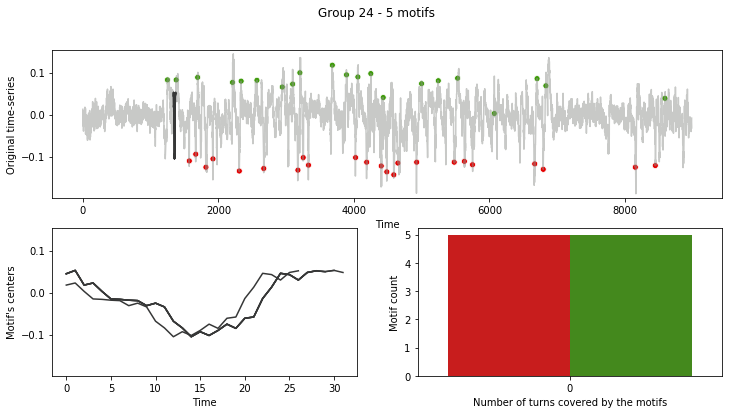

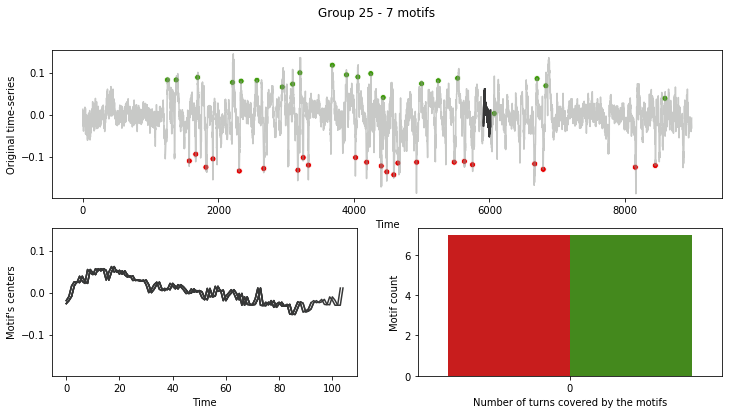

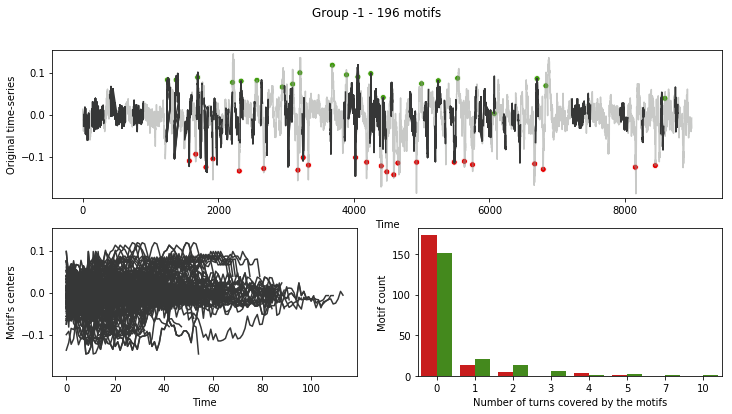

In [11]:
lon_viz.plot_lon_motif_groups(ts, events_ts, motif_dic_list, cluster_labels)

<a id='section5'></a>

## 5. Add-hoc exploration

In [9]:
mean_dist_list = [np.mean(vec) for vec in center_dist_mat]

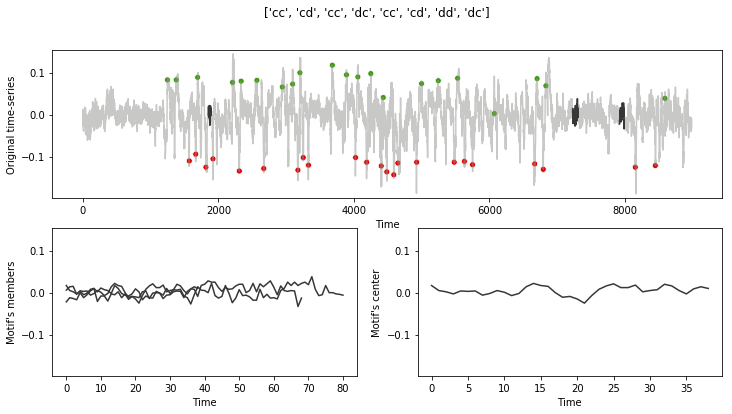

In [10]:
import matplotlib.pyplot as plt
motif_dic = motif_dic_list[np.argmax(mean_dist_list)]
lon_viz.plot_single_lon_motif(ts, events_ts, motif_dic)
plt.show()

In [ ]:
motif_index = motif_utils.return_motif_index_with_pattern(motif_dic_list, motif_dic['pattern'])
motif_neighbors_dic_list = motif_utils.get_motif_k_neighbors(motif_dic_list, motif_index, center_dist_mat, 10)
lon_viz.plot_single_lon_motif_group(ts, events_ts, motif_neighbors_dic_list, 'Neighbors')
plt.show()

In [ ]:
create_motif_table(motif_neighbors_dic_list)